In [51]:
import pandas as pd
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split_variables_removed.h5') as store:
    # X_cal = store.get('X_cal')
    # Y_cal = store.get('Y_cal')
    X_test = store.get('X_test')
    Y_test = store.get('Y_test')


X = X_test.values
Y = Y_test.values



In [52]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import numpy as np


window_size = 50
latent_variables = 3
n_pred_obs = 1

N_seg = X.shape[0]-window_size-n_pred_obs

model = make_pipeline(StandardScaler(), PLSRegression(n_components=latent_variables))
R2 = []
Q2 = []

Y_test_pred = np.zeros_like(Y)
outlier_mask = np.zeros_like(Y, np.bool_)
for seg in range(N_seg):

    X_seg_cal = X[ seg:seg+window_size, : ] 
    X_seg_test = X[ seg+window_size:seg+window_size+n_pred_obs, : ]
    Y_seg_cal = Y[ seg:seg+window_size ]
    Y_seg_test = Y[ seg+window_size:seg+window_size+n_pred_obs ]    
    

    model.fit(X_seg_cal, Y_seg_cal)

    Y_test_pred[seg+window_size] = model.predict(X_seg_test)[0]

    if (Y_test_pred[seg+window_size] < 0) | (Y_test_pred[seg+window_size] > 6) | (abs(Y_test_pred[seg+window_size] - Y_seg_cal[-1])>4):
        Y_test_pred[seg+window_size] = Y_seg_cal[-1]
        outlier_mask[seg+window_size] = True



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.36542751, 2.59961443, 3.29839361, 3.77662107, 4.02859217,
       3.70517896, 4.0525688 , 3.91317373, 5.72606698, 4.03809685,
       4.72861353, 3.52280309, 3.06186981, 2.30683932, 3.92242715,
       3.04926983, 2.84499028, 3.48176693, 2.16962191, 1.35047797,
       1.9077904 , 1.66033449, 2.67509594, 1.99860821, 2.29837

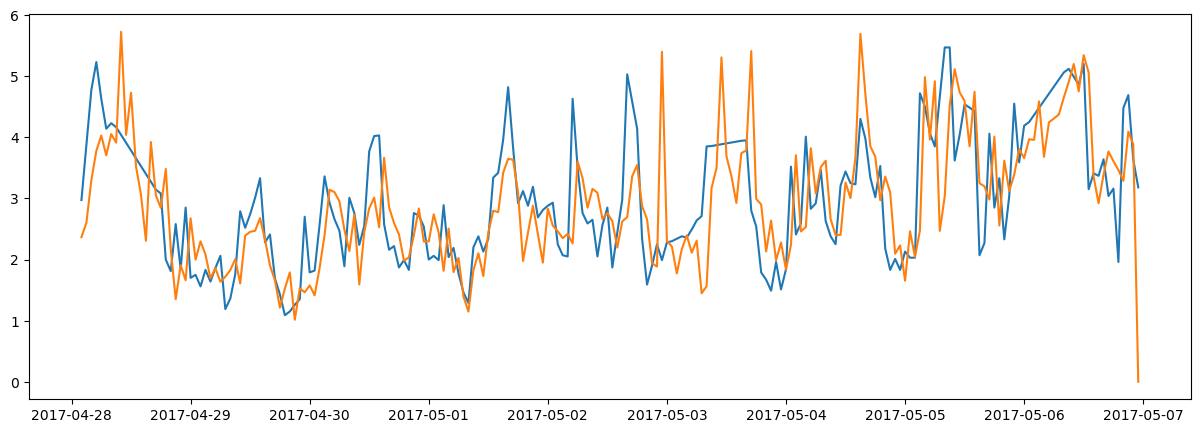

In [53]:
from matplotlib import pyplot as plt


plt.figure(figsize=(15,5))
plt.plot(Y_test[window_size:])
plt.plot(Y_test.index[window_size:],Y_test_pred[window_size:])

Y_test_pred